<br> <strong> Classification Model Case Study <br>
02/05/2020 | DAT-5303 Machine Learning </h4>
<br> Author: Keita Eriawan <br>
Hult International Business School<br>

_____________________________________________________________________________________________________________________

Apprentice Chef has given the task to create a machine learning model that predicts which customer would subscribes to their service. The service that they are launching is Halfway There, a cross-selling promotion where subscribers receive a half bottle of wine from a local California vineyard every Wednesday. 

The target variable is CROSS_SELL_SUCCESS

In this analysis, I will be creating a classification model from the Apprentice Chef Dataset. I will be following these stages for my analysis:

1. Importing the data
2. Exploring the data
3. Feature Engineering 
4. Building the model
5. Presenting the results

We skipped the data cleaning process because the data that was given was already queried, sampled and verified. 


_____________________________________________________________________________________________________________________

<strong> 1. Importing the data

In [2]:
# Loading the required packages #

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

# Scikit-learn packages #
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix       
from sklearn.metrics         import roc_auc_score          
from sklearn.neighbors       import KNeighborsClassifier   
from sklearn.neighbors       import KNeighborsRegressor    
from sklearn.preprocessing   import StandardScaler 
from sklearn.model_selection import GridSearchCV     
from sklearn.metrics         import make_scorer 
from sklearn.ensemble        import RandomForestClassifier     
from sklearn.ensemble        import GradientBoostingClassifier 

# Decision-Tree packages #
from sklearn.tree import DecisionTreeClassifier      
from sklearn.tree import export_graphviz             
from sklearn.externals.six import StringIO           
from IPython.display import Image                   
import pydotplus  

# Setting pandas print option #
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Specifying the file name #
file = 'Apprentice_Chef_Dataset.xlsx'

# Reading the file #
apprentice_chef = pd.read_excel(file)

_____________________________________________________________________________________________________________________

<strong> 2. Exploring the dataset

***

As we have imported all of the necessary packages and dataset, I would like to know what the dataset looks like. I will run the .info(), .describe() and .head() to showcase the data in a summarized version.

In [3]:
# First 5 rows of the dataset #
# apprentice_chef.head()

# Info about the dataset #
# apprentice_chef.info()

# Summary on the dataset #
# apprentice_chef.describe().round(2)

It would be easier to analyze data visually so in this stage, I will be creating two graphs; barplot to check the frequencies of each variables and scatterplot to see the relationship between the independent variable and dependent variable (CROSS_SELL_SUCCESS). For the barplot, I will be commenting it out to make the notebook run efficiently.

***

In [4]:
# ## Bar graph for outliers detection ###

# # Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 


# revenue #
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice_chef['REVENUE'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('REVENUE')
# plt.ylabel('frequency')


# total_meals_ordered #
# plt.subplot(2, 2, 2)
# sns.distplot(apprentice_chef['TOTAL_MEALS_ORDERED'],
#              bins  = 'fd',
#              color = 'b')
# plt.xlabel('TOTAL_MEALS_ORDERED')
# plt.ylabel('frequency')

# unique_meals_purch #
# plt.subplot(2, 2, 3)
# sns.distplot(apprentice_chef['UNIQUE_MEALS_PURCH'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('UNIQUE_MEALS_PURCH')
# plt.ylabel('frequency')


# contacts_w_customer_service #
# plt.subplot(2, 2, 4)
# sns.distplot(apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
#              bins  = 'fd',
#              color = 'b')
# plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
# plt.ylabel('frequency')
# plt.tight_layout()
# plt.show()

# #############################################################################

# Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# product_categories_viewed #
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
# plt.ylabel('frequency')

# avg_time_per_site_visit # 
# plt.subplot(2, 2, 2)
# sns.distplot(apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('AVG_TIME_PER_SITE_VISIT')
# plt.ylabel('frequency')

# mobile_number # 
# plt.subplot(2, 2, 3)
# sns.distplot(apprentice_chef['MOBILE_NUMBER'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('MOBILE_NUMBER')
# plt.ylabel('frequency')

# cancellations_before_noon # 
# plt.subplot(2, 2, 4)
# sns.distplot(apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('CANCELLATIONS_BEFORE_NOON')
# plt.ylabel('frequency')
# plt.tight_layout()
# plt.show()


# #############################################################################

# Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# # cancellations_after_noon #
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice_chef['CANCELLATIONS_AFTER_NOON'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('CANCELLATIONS_AFTER_NOON')
# plt.ylabel('frequency')

# tastes_and_preferences #
# plt.subplot(2, 2, 2)
# sns.distplot(apprentice_chef['TASTES_AND_PREFERENCES'],
#              bins  = 'fd',
#              color = 'b')
# plt.xlabel('TASTES_AND_PREFERENCES')
# plt.ylabel('frequency')

# mobile_logins #
# plt.subplot(2, 2, 3)
# sns.distplot(apprentice_chef['MOBILE_LOGINS'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('MOBILE_LOGINS')
# plt.ylabel('frequency')

# pc_logins #
# plt.subplot(2, 2, 4)
# sns.distplot(apprentice_chef['PC_LOGINS'],
#              bins  = 'fd',
#              color = 'b')
# plt.xlabel('PC_LOGINS')
# plt.ylabel('frequency')
# plt.tight_layout()
# plt.show()


# #############################################################################

# Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# weekly_plan #
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice_chef['WEEKLY_PLAN'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('WEEKLY_PLAN')
# plt.ylabel('frequency')

# early_deliveries #
# plt.subplot(2, 2, 2)
# sns.distplot(apprentice_chef['EARLY_DELIVERIES'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('EARLY_DELIVERIES')
# plt.ylabel('frequency')

# late_deliveries # 
# plt.subplot(2, 2, 3)
# sns.distplot(apprentice_chef['LATE_DELIVERIES'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('LATE_DELIVERIES')
# plt.ylabel('frequency')

# package_locker #  
# plt.subplot(2, 2, 4)
# sns.distplot(apprentice_chef['PACKAGE_LOCKER'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('PACKAGE_LOCKER')
# plt.ylabel('frequency')
# plt.tight_layout()
# plt.show()


# #############################################################################

# Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# refrigerated_locker #  
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice_chef['REFRIGERATED_LOCKER'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('REFRIGATED_LOCKER')
# plt.ylabel('frequency')

# followed_recommendations_pct # 
# plt.subplot(2, 2, 2)
# sns.distplot(apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
#              bins  = 'fd',
#              color = 'b')
# plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
# plt.ylabel('frequency')

# avg_prep_vid_time # 
# plt.subplot(2, 2, 3)
# sns.distplot(apprentice_chef['AVG_PREP_VID_TIME'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('AVG_PREP_VID_TIME')
# plt.ylabel('frequency')

# largest_order_size #
# plt.subplot(2, 2, 4)
# sns.distplot(apprentice_chef['LARGEST_ORDER_SIZE'],
#              bins  = 'fd',
#              color = 'b')
# plt.xlabel('LARGEST_ORDER_SIZE')
# plt.ylabel('frequency')
# plt.tight_layout()
# plt.show()


# #############################################################################

# Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# master_classes_attended # 
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice_chef['MASTER_CLASSES_ATTENDED'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('MASTER_CLASSES_ATTENDED')
# plt.ylabel('frequency')

# median_meal_rating #
# plt.subplot(2, 2, 2)
# sns.distplot(apprentice_chef['MEDIAN_MEAL_RATING'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('MEDIAN_MEAL_RATING')
# plt.ylabel('frequency')

# avg_clicks_per_visit #
# plt.subplot(2, 2, 3)
# sns.distplot(apprentice_chef['AVG_CLICKS_PER_VISIT'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('AVG_CLICKS_PER_VISIT')
# plt.ylabel('frequency')

# total_photos_viewed #            
# plt.subplot(2, 2, 4)
# sns.distplot(apprentice_chef['TOTAL_PHOTOS_VIEWED'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('TOTAL_PHOTOS_VIEWED')
# plt.ylabel('frequency')
# plt.tight_layout()
# plt.show()

As the target variable is binary (1 = Yes, 0 = No), the scatterplot would be logistical with two output; 1 por 0. It is important to visualize the graph as we could create a threshold on the changes. Same goes for the scatterplot, I will be commenting out to make my notebook run efficiently.

***

In [5]:
# #### Scatterplot for trend change detection #####

# Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# total_meals_ordered #
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = apprentice_chef['TOTAL_MEALS_ORDERED'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('total_meals_ordered')
# plt.ylabel('cross sell success')

# # unique_meals_purch #
# plt.subplot(2, 2, 2)
# sns.scatterplot(x = apprentice_chef['UNIQUE_MEALS_PURCH'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('unique_meals_purch')
# plt.ylabel('cross sell success')


# # contacts_w_customer_service #
# plt.subplot(2, 2, 3)
# sns.scatterplot(x = apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('contacts_w_customer_service')
# plt.ylabel('cross sell success')


# # product_categories_viewed #
# plt.subplot(2, 2, 4)
# sns.scatterplot(x = apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('product_categories_viewed')
# plt.ylabel('cross sell success')
# plt.tight_layout()
# plt.savefig('AC Scatter 1')
# plt.show()


# ##############################################################################

# # Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# # avg_time_per_site_visit # 
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'b')
# plt.xlabel('avg_time_per_site_visit')
# plt.ylabel('cross sell success')

# # mobile_number # 
# plt.subplot(2, 2, 2)
# sns.scatterplot(x = apprentice_chef['MOBILE_NUMBER'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'b')
# plt.xlabel('mobile_number')
# plt.ylabel('cross sell success')

# # cancellations_before_noon # 
# plt.subplot(2, 2, 3)
# sns.scatterplot(x = apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'b')
# plt.xlabel('cancellations_before_noon')
# plt.ylabel('cross sell success')

# # cancellations_after_noon #
# plt.subplot(2, 2, 4)
# sns.scatterplot(x = apprentice_chef['CANCELLATIONS_AFTER_NOON'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'b')
# plt.xlabel('cancellations_after_noon')
# plt.ylabel('cross sell success')
# plt.tight_layout()
# plt.savefig('AC Scatter 2')
# plt.show()


# ##############################################################################

# # Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# # tastes_and_preferences #
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = apprentice_chef['TASTES_AND_PREFERENCES'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'g')
# plt.xlabel('tastes_and_preferences')
# plt.ylabel('cross sell success')

# # mobile_logins #
# plt.subplot(2, 2, 2)
# sns.scatterplot(x = apprentice_chef['MOBILE_LOGINS'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'g')
# plt.xlabel('mobile_logins')
# plt.ylabel('cross sell success')

# # pc_logins #
# plt.subplot(2, 2, 3)
# sns.scatterplot(x = apprentice_chef['PC_LOGINS'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'g')
# plt.xlabel('pc_logins')
# plt.ylabel('cross sell success')

# # weekly_plan #
# plt.subplot(2, 2, 4)
# sns.scatterplot(x = apprentice_chef['WEEKLY_PLAN'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'g')
# plt.xlabel('weekly_plan')
# plt.ylabel('cross sell success')
# plt.tight_layout()
# plt.savefig('AC Scatter 3')
# plt.show()


# ##############################################################################

# # Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# # early_deliveries #
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = apprentice_chef['EARLY_DELIVERIES'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'y')
# plt.xlabel('early_deliveries')
# plt.ylabel('cross sell success')

# # late_deliveries # 
# plt.subplot(2, 2, 2)
# sns.scatterplot(x = apprentice_chef['LATE_DELIVERIES'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'y')
# plt.xlabel('late_deliveries')
# plt.ylabel('cross sell success')

# # package_locker #  
# plt.subplot(2, 2, 3)
# sns.scatterplot(x = apprentice_chef['PACKAGE_LOCKER'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'y')
# plt.xlabel('package_locker')
# plt.ylabel('cross sell success')

# # refrigerated_locker #  
# plt.subplot(2, 2, 4)
# sns.scatterplot(x = apprentice_chef['REFRIGERATED_LOCKER'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'y')
# plt.xlabel('refrigerated_locker')
# plt.ylabel('cross sell success')
# plt.tight_layout()
# plt.savefig('AC Scatter 4')
# plt.show()


# ##############################################################################

# # Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# # followed_recommendations_pct # 
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('followed_recommendations_pct')
# plt.ylabel('cross sell success')

# # avg_prep_vid_time # 
# plt.subplot(2, 2, 2)
# sns.scatterplot(x = apprentice_chef['AVG_PREP_VID_TIME'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('avg_prep_vid_time')
# plt.ylabel('cross sell success')

# # largest_order_size #
# plt.subplot(2, 2, 3)
# sns.scatterplot(x = apprentice_chef['LARGEST_ORDER_SIZE'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('largest_order_size')
# plt.ylabel('cross sell success')

# # master_classes_attended # 
# plt.subplot(2, 2, 4)
# sns.scatterplot(x = apprentice_chef['MASTER_CLASSES_ATTENDED'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'r')
# plt.xlabel('master_classes_attended')
# plt.ylabel('cross sell success')
# plt.tight_layout()
# plt.savefig('AC Scatter 5')
# plt.show()


# ##############################################################################

# # Figure and axis size #
# fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# # median_meal_rating #
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = apprentice_chef['MEDIAN_MEAL_RATING'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'b')
# plt.xlabel('median_meal_rating')
# plt.ylabel('cross sell success')

# # avg_clicks_per_visit #
# plt.subplot(2, 2, 2)
# sns.scatterplot(x = apprentice_chef['AVG_CLICKS_PER_VISIT'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'b')
# plt.xlabel('avg_clicks_per_visit')
# plt.ylabel('cross sell success')

# # total_photos_viewed #            
# plt.subplot(2, 2, 3)
# sns.scatterplot(x = apprentice_chef['TOTAL_PHOTOS_VIEWED'],
#                y = apprentice_chef['CROSS_SELL_SUCCESS'],
#                color = 'b')
# plt.xlabel('total_photos_viewed')
# plt.ylabel('cross sell success')
# plt.tight_layout()
# plt.savefig('AC Scatter 6')
# plt.show()

In the exploratory stage, we can see that there are patterns from the barplot and the scatterplot. For example, the avg_time_per_site_visit scatterplot indicates that there is an outlier on the person who subscribe to the cross sell promotion. A customer who spends on average of 1600 seconds on the website has subscribe to the cross sell promotion service but the scatterplot shows that on average customers who spent around 0 - 600 seconds has a subscribes to the cross sell promotion services. This is interesting because when we visualise the data, we can identify different patterns and trends that can be useful for the analysis and feature engineering stage.

_____________________________________________________________________________________________________________________

<strong> 3. Feature Engineering

In this stage, I will be analyzing the variables on the dataset and conduct feature engineering process. I will check the presence of an outlier and create an outlier threshold to create a new variable. Also, I will creating new features based on the variables that are presented in the dataset.

_____________________________________________________________________________________________________________________

<strong> 3.1 Creating a new features based on the variables on the dataset 

First, I will be creating new features. The method that I will be doing is to combine two or more variables that can create a new features.

<strong> 3.1.1 Average number of meal ordered that follows the meal recommendation that was generated for them

For this feature, I would like to create a feature on the average number of meals that followed the recommendation that was provided. For example, a customer orders 200 meals in total and 50% of the time they follow the recommendations. This new feature showcases the number of meals that follows the recommendations and the one that doesn't follow the recommendation. In this case, we can assume that out of the 200 meals, 100 of them the customer cooked the meal with the recommendation.

***

In [6]:
# Changing the FOLLOWED_RECOMMENDATIONS_PCT column into a percentage format #

apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'] = apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'] / 100

# Number of meal prepared that follows the recommendation #

apprentice_chef['TOTAL_MEAL_FOLLOWED_RECOMMENDATIONS'] = apprentice_chef['TOTAL_MEALS_ORDERED'] * apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT']

# Round the value into 2 decimal point #

apprentice_chef['TOTAL_MEAL_FOLLOWED_RECOMMENDATIONS'] = apprentice_chef['TOTAL_MEAL_FOLLOWED_RECOMMENDATIONS'].round(0)


<strong> 3.1.2 Average number of meal ordered that does not follows the meal recommendation that was generated for them

Vice versa, I have created a new feature with the number of meal prepared that doesn't follow the recommendations. I simply subtract the total meals ordered with the number of meal prepared that follows the recommendations.

***

In [7]:
# Number of meal prepared that does not follows the recommendation #

apprentice_chef['TOTAL_MEAL_NOT_FOLLOWED_RECOMMENDATIONS'] = apprentice_chef['TOTAL_MEALS_ORDERED'] - apprentice_chef['TOTAL_MEAL_FOLLOWED_RECOMMENDATIONS']

<strong> 3.1.3 Average meal price per month

For this feature, I would like to calculate the average price meal per month for each customer. Based on the case study, the lowest price for one meal is 10 dollars and the highest price for one meal is 23 dollars. This is the pricing excluding the beverages. I cannot identify if the customer ordered drinks or not so in this case, I would assume that this is the price for meals. 

***

In [8]:
# Average price for one meal per month #

apprentice_chef['AVERAGE_MEAL_PRICE_PER_MONTH'] = apprentice_chef['REVENUE'] / apprentice_chef['TOTAL_MEALS_ORDERED']

# Rounding of to 2 decimal points #

apprentice_chef['AVERAGE_MEAL_PRICE_PER_MONTH'] = apprentice_chef['AVERAGE_MEAL_PRICE_PER_MONTH'].round(2)

<strong> 3.1.4 Average meal ordered per month

For this feature, I would like to know the average number of meal ordered per month for each customer. To do this, I would simply get the total meals ordered column and divided each of the rows with 12 as the dataset is collected in the span of 12 months.

***

In [9]:
# Average total meal ordered per month #

apprentice_chef['AVERAGE_MEAL_ORDERED_PER_MONTH'] = apprentice_chef['TOTAL_MEALS_ORDERED'] / 12

# Rounding off to 2 decimal points #

apprentice_chef['AVERAGE_MEAL_ORDERED_PER_MONTH'] = apprentice_chef['AVERAGE_MEAL_ORDERED_PER_MONTH'].round(2)

<strong> 3.1.5 Total number of cancellation

For this feature, I would like to combine the number of cancellation before and after noon.

***

In [10]:
# Total number of cancellation #

apprentice_chef['TOTAL_CANCELLATION'] = apprentice_chef['CANCELLATIONS_BEFORE_NOON'] + apprentice_chef['CANCELLATIONS_AFTER_NOON']


<strong> 3.1.6 Total Number of Login

For this feature, I would like to create the total number of login by combining the number of login via PC and login via mobile for each customers.

***

In [11]:
# Total number of login #

apprentice_chef['TOTAL_LOGIN'] = apprentice_chef['MOBILE_LOGINS'] + apprentice_chef['PC_LOGINS']


<strong> 3.1.7 Total number of normal delivery per customer & Average number of normal deliveries per customer

For this feature, I would like to know the number of normal deliveries and special deliveries. The definition of normal deliveries is the the number of deliveries that are within the designated delivery windows. Special deliveries is the number of early deliveries + late deliveries. 

I will be adding both early and late deliveries and the result will be used as a divisor to total meal ordered. There is a limitation in this feature as we are assuming that person orders one meal.

I will be able to create two features:
1. Total number of special deliveries per customer
2. Total number of normal deliveries per customer

***

In [12]:
# Adding the number of early deliveries and late deliveries to create total number of special deliveries #
apprentice_chef['TOTAL_SPECIAL_DELIVERIES'] = apprentice_chef['EARLY_DELIVERIES'] + apprentice_chef['LATE_DELIVERIES']

# Creating the total number of normal deliveries #
apprentice_chef['TOTAL_NORMAL_DELIVERIES'] = apprentice_chef['TOTAL_MEALS_ORDERED'] - apprentice_chef['TOTAL_SPECIAL_DELIVERIES']

<strong> 3.1.8 Average customer engagement per site visit

For this feature, I would calculate it by dividing the product categories viewed with the average click per visit. I want to create a feature that showcase the value of the website. The variables that are connected to the website are "AVG_TIME_PER_SITE_VISIT", "PRODUCT_CATEGORIES_VIEWED", "AVG_CLICKS_PER_VISIT" and "TOTAL_PHOTOS_VIEWED".In this case, I would like to measure the engagement in the website by looking on their average click per visit and the product categories that they are viewing.

***

In [13]:
# Creating average customer engagement per site visit #

apprentice_chef['AVG_CUSTOMER_ENGAGEMENT'] = apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] / apprentice_chef['AVG_CLICKS_PER_VISIT']

# Rounding it to 2 decimal places #
apprentice_chef['AVG_CUSTOMER_ENGAGEMENT'] = apprentice_chef['AVG_CUSTOMER_ENGAGEMENT'].round(2)

***

<strong> 3.2 Handling the categorical variable 

In order to create more features, I would like to analyze the categorical variables. These variables are "NAME", "EMAIL", "FIRST_NAME" and "LAST_NAME". The method that I will be using to transform my categorical variables is the dummy variables method.

<strong> 3.2.1 Separating the email name and the email domain

I am trying to separate the email name and the domain name in the "EMAIL" column. The purpose of this separation is to group the customers to different domains ("personal", "junk", "professional")

***

In [14]:
### Splitting email names: name and domain ###

# Placeholder list #
placeholder_lst = []

# Creating a for loop to separate the domain and email name #
for index, col in apprentice_chef.iterrows():
    split_email = apprentice_chef.loc[index, 'EMAIL'].split(sep = '@')
    placeholder_lst.append(split_email)

# Creating a new dataframe for the separate email name and domain #
email_df = pd.DataFrame(placeholder_lst)

After I created a separate data frame with two variables: email name and email domain, I will be concatenating the email domain into the apprentice_chef data set.

***

In [15]:
### Concatenating the new email domain with the  original dataset ###

# Renaming the column #
email_df.columns = ['email_name', 'email_domain']

# Concatenating email_domain with apprentice_chef df #
apprentice_chef = pd.concat([apprentice_chef, email_df.loc[ : , 'email_domain']],
                           axis=1)

# Checking the counts on each domain #
apprentice_chef.loc[ : , 'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
mcdonalds.com        28
cocacola.com         28
merck.com            28
nike.com             27
apple.com            27
ibm.com              26
ge.org               26
dupont.com           26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
verizon.com          22
mmm.com              22
pg.com               22
caterpillar.com      22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

<strong> 3.2.2 Creating a new column for the dummy variables

Next, I am creating two list that contains the name of the personal domains and junk domains. With this, I will create a for loop to categorize the email. After that, I will create a new variable name called DOMAIN_GROUP and add it to the apprentice_chef data set.

***

In [16]:
### Categorising the email type by domain ###

# Creating a list of domain types #

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com','@aol.com', '@hotmail.com', '@live.com', '@msn.com',
                    '@passport.com']

# placeholder list #
placeholder_lst = []

# Creating a loop for categorising email domain #
for domain in apprentice_chef['email_domain']:
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')
    else:
        placeholder_lst.append('professional')
        
# Concatenating with original DataFrame #
apprentice_chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# Checking the count of each email type #
# apprentice_chef['DOMAIN_GROUP'].value_counts()

Now I will be creating a dummy variable for each of the domain names in the DOMAIN GROUP column

***

In [17]:
## Creating a dummy variable for the email domain ###

#one hot encoding categorical variables #
one_hot_domain_group = pd.get_dummies(apprentice_chef['DOMAIN_GROUP'])

# Joining codings together #
apprentice_chef = apprentice_chef.join([one_hot_domain_group])

# saving new columns #
new_columns = apprentice_chef.columns

<strong> 3.2.3 Dummy variables for median meal rating

I would like to create a dummy variables for the median meal rating

***

In [18]:
#one hot encoding categorical variables #
one_hot_median_meal_rating = pd.get_dummies(apprentice_chef['MEDIAN_MEAL_RATING'])

# Joining codings together #
apprentice_chef = apprentice_chef.join([one_hot_median_meal_rating])

# saving new columns #
new_columns = apprentice_chef.columns

# Renaming the column names #
apprentice_chef.rename(columns={1:'VERY_LOW_MEAL_RATING',
                                2:'LOW_MEAL_RATING',
                                3:'NEUTRAL_MEAL_RATING',
                                4:'HIGH_MEAL_RATING',
                                5:'VERY_HIGH_MEAL_RATING'},
                                inplace = True)

<strong> 3.3 Outlier Threshold 

For my last feature engineering process, I will be creating outliers threshold. The purpose of creating this outliers threshold is to capture the noise of each of the variable. With more feature is created with the threshold, hopefully it will increase the accuracy of the model.

***

In [19]:
# Creating the outliers threshold #

REVENUE_hi                      = 3000
TOTAL_MEALS_ORDERED_hi          = 150
UNIQUE_MEALS_PURCH_hi           = 7
CONTACTS_W_CUSTOMER_SERVICE_lo  = 4
CONTACTS_W_CUSTOMER_SERVICE_hi  = 9
AVG_TIME_PER_SITE_VISIT_hi      = 180
CANCELLATIONS_BEFORE_NOON_hi    = 1
CANCELLATIONS_AFTER_NOON_hi     = 2
MOBILE_LOGINS_lo                = 5
MOBILE_LOGINS_hi                = 6
PC_LOGINS_lo                    = 1
PC_LOGINS_hi                    = 2
WEEKLY_PLAN_hi                  = 15
EARLY_DELIVERIES_hi             = 2
LATE_DELIVERIES_hi              = 5
AVG_PREP_VID_TIME_hi            = 200
LARGEST_ORDER_SIZE_lo           = 2
LARGEST_ORDER_SIZE_hi           = 6
MASTER_CLASSES_ATTENDED_hi      = 2
AVG_CLICKS_PER_VISIT_lo         = 10
TOTAL_PHOTOS_VIEWED_hi          = 500
TOTAL_PHOTOS_VIEWED_lo          = 0

After I created the threshold for the outliers, I will be creating new columns for each of the outliers that I have identified.

***

In [20]:
### Creating the outlier columns  ###

# REVENUE #

apprentice_chef['OUT_REVENUE'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_REVENUE'][apprentice_chef['REVENUE'] 
                                                                 > REVENUE_hi]

apprentice_chef['OUT_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# TOTAL_MEALS_ORDERED #

apprentice_chef['OUT_TOTAL_MEALS_ORDERED'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] 
                                                                 > TOTAL_MEALS_ORDERED_hi]

apprentice_chef['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# UNIQUE_MEALS_PURCH #

apprentice_chef['OUT_UNIQUE_MEALS_PURCH'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] 
                                                                 > UNIQUE_MEALS_PURCH_hi ]

apprentice_chef['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE #

apprentice_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE']
                                                                         > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = apprentice_chef.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] 
                                                                         < CONTACTS_W_CUSTOMER_SERVICE_lo]                                                                 

apprentice_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

apprentice_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_TIME_PER_SITE_VISIT #

apprentice_chef['OUT_AVG_TIME_PER_SITE_VISIT'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][apprentice_chef['AVG_TIME_PER_SITE_VISIT']
                                                                         > AVG_TIME_PER_SITE_VISIT_hi]

apprentice_chef['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_BEFORE_NOON #

apprentice_chef['OUT_CANCELLATIONS_BEFORE_NOON'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][apprentice_chef['CANCELLATIONS_BEFORE_NOON']
                                                                         > CANCELLATIONS_BEFORE_NOON_hi]

apprentice_chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_AFTER_NOON #

apprentice_chef['OUT_CANCELLATIONS_AFTER_NOON'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][apprentice_chef['CANCELLATIONS_AFTER_NOON']
                                                                         > CANCELLATIONS_AFTER_NOON_hi]

apprentice_chef['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# EARLY_DELIVERIES # 

apprentice_chef['OUT_EARLY_DELIVERIES'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_EARLY_DELIVERIES'][apprentice_chef['EARLY_DELIVERIES'] 
                                                                 > EARLY_DELIVERIES_hi]

apprentice_chef['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
# LATE_DELIVERIES # 

apprentice_chef['OUT_LATE_DELIVERIES'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_LATE_DELIVERIES'][apprentice_chef['LATE_DELIVERIES'] 
                                                                 > LATE_DELIVERIES_hi]

apprentice_chef['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_PREP_VID_TIME #

apprentice_chef['OUT_AVG_PREP_VID_TIME'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] 
                                                                 > AVG_PREP_VID_TIME_hi]

apprentice_chef['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LARGEST_ORDER_SIZE #

apprentice_chef['OUT_LARGEST_ORDER_SIZE'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_LARGEST_ORDER_SIZE'][apprentice_chef['LARGEST_ORDER_SIZE']
                                                                         > LARGEST_ORDER_SIZE_hi]
condition_lo = apprentice_chef.loc[0:,'OUT_LARGEST_ORDER_SIZE'][apprentice_chef['LARGEST_ORDER_SIZE'] 
                                                                         < LARGEST_ORDER_SIZE_lo]                                                                 

apprentice_chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

apprentice_chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# MASTER_CLASSES_ATTENDED #

apprentice_chef['OUT_MASTER_CLASSES_ATTENDED'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][apprentice_chef['MASTER_CLASSES_ATTENDED'] 
                                                                 > MASTER_CLASSES_ATTENDED_hi]

apprentice_chef['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# AVG_CLICKS_PER_VISIT # 

apprentice_chef['OUT_AVG_CLICKS_PER_VISIT'] = 0

# Creating the condition for outliers #
condition_lo = apprentice_chef.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice_chef['AVG_CLICKS_PER_VISIT'] 
                                                                         < AVG_CLICKS_PER_VISIT_lo]                                                                 

apprentice_chef['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_PHOTOS_VIEWED #

apprentice_chef['OUT_TOTAL_PHOTOS_VIEWED'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED']
                                                                         > TOTAL_PHOTOS_VIEWED_hi]
condition_lo = apprentice_chef.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED'] 
                                                                         < TOTAL_PHOTOS_VIEWED_lo]                                                                 

apprentice_chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

apprentice_chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

<strong> 3.4 Dropping categorical variables  

The last step for the feature engineering is to drop all of the unnecessary variables; variables that has no added value to the model. This is mostly for the categorical variables but for analysis purpose, I will keep "NAME" in the dataset.

***

In [21]:
# Dropping unnecessary variables #

apprentice_chef = apprentice_chef.drop('EMAIL', axis = 1)
apprentice_chef = apprentice_chef.drop('FIRST_NAME', axis = 1)
apprentice_chef = apprentice_chef.drop('FAMILY_NAME', axis = 1)
apprentice_chef = apprentice_chef.drop('email_domain', axis = 1)
apprentice_chef = apprentice_chef.drop('DOMAIN_GROUP', axis = 1)

After dropping all of the unnecessary variables, I will save this dataset to Excel.

In [22]:
# Saving the dataset into Excel #

# apprentice_chef.to_excel('A2_dataset.xlsx')

***

<strong> 4. Building Classification Model 

In this stage, I will be creating different classification model using the featured engineered dataset. I will be creating these models:

1. Logistic Regression
2. Decision Tree
3. k-Nearest Neighbors
4. Naive Bayes Classifier
5. Random Forest

But first, I will check the correlation for each of the variables with the target variable "CROSS_SELL_SUCCESS"

***

In [23]:
# Correlation for target variable and each explanatory variable #

#df_corr = apprentice_chef.corr().round(2)

#df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

***

<strong> 4.1 Logistic Regression Model

***

First, I will be creating the logistical regression in sci-kit learn. Before that, I would like to give credit to Professor Chase Kusterer from Hult International Business School that has created the def functio <strong>optimal_neighbors</strong> and <strong> visual_cm </strong> which I will be using in my analysis.

For the <strong>optimal_neighbors</strong> def function, it is basically the function to find the optimized number of n is KNN Classifier model. Most of the functions is default and it will also plot the visualization of the 'optimized' number of neighbors.

For the <strong> visual_cm </strong>, it is a def function to plot the confusion matrix. 

***

In [24]:
### Optimal neighbors ###

def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=222,
                      response_type='class',
                      max_neighbors=20,
                      show_viz=True):
    
    if standardize == True:
        # optionally standardizing X_data #
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train_test_split #
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy #
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range #
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type #
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy #
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy #
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization #
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors #
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object #
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # plotting the heatmap #
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Reds',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

The first step is to create a dictionary on two list: 
1. Candidate model with the full variables
2. Candidate model with the significant variables

***

In [25]:
# Creating the dictionary for the candidate models #

candidate_dict = {

# all variables from the full model #
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS','PC_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES','LATE_DELIVERIES',
                   'PACKAGE_LOCKER','REFRIGERATED_LOCKER','FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT',
                   'TOTAL_PHOTOS_VIEWED','TOTAL_MEAL_FOLLOWED_RECOMMENDATIONS', 
                   'TOTAL_MEAL_NOT_FOLLOWED_RECOMMENDATIONS','AVERAGE_MEAL_PRICE_PER_MONTH',
                   'AVERAGE_MEAL_ORDERED_PER_MONTH','TOTAL_CANCELLATION','TOTAL_LOGIN','TOTAL_SPECIAL_DELIVERIES',
                   'TOTAL_NORMAL_DELIVERIES','AVG_CUSTOMER_ENGAGEMENT', 'junk','personal','professional',
                   'VERY_LOW_MEAL_RATING','LOW_MEAL_RATING','NEUTRAL_MEAL_RATING','HIGH_MEAL_RATING',
                   'VERY_HIGH_MEAL_RATING', 'OUT_REVENUE', 'OUT_TOTAL_MEALS_ORDERED','OUT_UNIQUE_MEALS_PURCH',
                   'OUT_CONTACTS_W_CUSTOMER_SERVICE','OUT_AVG_TIME_PER_SITE_VISIT','OUT_CANCELLATIONS_BEFORE_NOON',
                   'OUT_CANCELLATIONS_AFTER_NOON','OUT_EARLY_DELIVERIES', 'OUT_LATE_DELIVERIES', 
                   'OUT_AVG_PREP_VID_TIME','OUT_LARGEST_ORDER_SIZE','OUT_MASTER_CLASSES_ATTENDED',
                   'OUT_AVG_CLICKS_PER_VISIT','OUT_TOTAL_PHOTOS_VIEWED'],
 
# significant variables from the full model #
 'logit_sig'    : ['FOLLOWED_RECOMMENDATIONS_PCT' , 'TOTAL_MEAL_FOLLOWED_RECOMMENDATIONS', 
                   'professional', 'junk', 'OUT_CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_BEFORE_NOON',
                   'OUT_TOTAL_MEALS_ORDERED']

}

After creating the dictionary, I will now build my logistic regression in Scikit-learn using the logit_sig variables.

***

In [26]:
# train/test split with the significant full model #
apprentice_chef_data   =  apprentice_chef.loc[ : , candidate_dict['logit_sig']]
apprentice_chef_target =  apprentice_chef.loc[ : , 'CROSS_SELL_SUCCESS']

# Creating the default SEED #
SEED = 222

# Train_test_split the data #
X_train, X_test, y_train, y_test = train_test_split(
            apprentice_chef_data,
            apprentice_chef_target,
            test_size    = 0.25,
            random_state = SEED,
            stratify     = apprentice_chef_target)


# Instantiating the logistic regression model #
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = SEED)


# Fitting the training data #
logreg_fit = logreg.fit(X_train, y_train)


# Predicting based on the testing set #
logreg_pred = logreg_fit.predict(X_test)


# Print the scoring results #
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

Training ACCURACY: 0.7464
Testing  ACCURACY: 0.7351


For this logistic regression, the metric that is used to measure how good the model is accuracy. However, accuracy has some downside. We only measure accuracy from one end. If we predict that only 67% of the customers subscribe to the cross sell promotion, we can only be 67% accurate during the analysis stage which is bad. In this case, confusion matrix is the tool that is more appropriate for measuring classification model performance.

This is an illustration of the confusion matrix based on the analysis context:

~~~  
  True Positives                                        False Positives 
  PREDICTED: Subscriber (CROSS_SELL_SUCCESS = 1)     |  PREDICTED: Non-subscriber (CROSS_SELL_SUCCESS = 0)
  ACTUAL:    Subscriber (CROSS_SELL_SUCCESS = 1)     |  ACTUAL:    Subscriber     (CROSS_SELL_SUCCESS = 1)
                                                     |
  ---------------------------------------------------|----------------------------------------------------
                                                     |  
  False Negatives                                    |  True Negatives
  PREDICTED: Subscriber     (CROSS_SELL_SUCCESS = 1) |  PREDICTED: Non-subscriber (CROSS_SELL_SUCCESS = 0)
  ACTUAL:    Non-subscriber (CROSS_SELL_SUCCESS = 0) |  ACTUAL:    Non-subscriber (CROSS_SELL_SUCCESS = 0)
  
~~~

***

In [27]:
# # Creating the confusion matrix #

# print(confusion_matrix(y_true = y_test,
#                        y_pred = logreg_pred))

# # Visualizing the confusion matrix using the visual_cm def function #
# visual_cm(true_y = y_test,
#           pred_y = logreg_pred,
#           labels = ['Subscriber', 'Non-subscriber'])

The other most common metrics that is used to measure classification models is the area under the curve (AUC). The AUC takes into account on both sensitivity and specificity. Sensitivity is the measurement of the proportion of correctly identified values that are positive. Specificity is the measurement of the proportion of correctly identified values that are negatives. In our final model, I would like to showcase the model's training accuracy, testing accuracy and AUC value.

***

In [28]:
# # Calculating the AUC curve #
# roc_auc_score(y_true  = y_test,
#               y_score = logreg_pred)

I will be creating a code that would let me save each model's performance for my final results.

***

In [29]:
# creating an empty list #
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy #
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy #
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value #
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results #
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# printing the results #
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7464, 0.7351, 0.6916]


***

<strong> 4.2 KNN Classification Model

***

The second mode that I would do is the k-Nearest Neighbors(KNN). For the KNN classification model, I would like to scale my explanatory variables and I would also like to identify the optimal number of the neighbors using the <strong> optimal_neighbors </strong>.

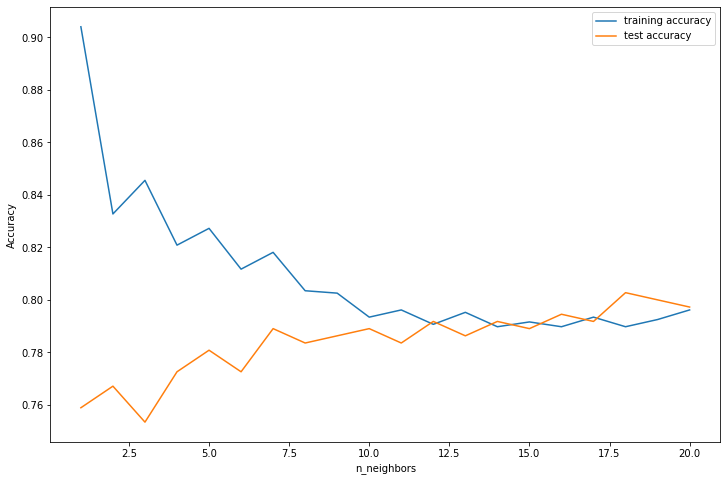

The optimal number of neighbors is: 18


In [30]:
# Plotting the optimal number for neighbors #

opt_neighbors = optimal_neighbors(X_data = X_train,
                                 y_data = y_train)

***

In [31]:
### Scaling the explanatory variable and building the KNN classification model ###

# Instantiating the  StandardScaler() #
scaler = StandardScaler()

# Fitting the data #
scaler.fit(apprentice_chef_data)

# Transforming the data #
X_scaled = scaler.transform(apprentice_chef_data)

# converting the X_scaled into a DataFrame #
X_scaled_df = pd.DataFrame(X_scaled) 

# train_test_split of the scaled data #
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            apprentice_chef_target,
            random_state = SEED,
            test_size = 0.25,
            stratify = apprentice_chef_target)

# instantiating a KNN classification model with optimal neighbors #
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)

# fitting the training data #
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)

# predicting based on the testing set #
knn_pred = knn_fit.predict(X_test)


# printing the results #
print('Training ACCURACY:', knn_opt.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', knn_opt.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))

Training ACCURACY: 0.6765
Testing  ACCURACY: 0.6797
AUC Score        : 0.6916


After I got the result for the KNN classification model, I will be saving the result on the model performance that I created before.

***

In [32]:
# train accuracy for KNN #
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy for KNN #
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value for KNN #
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# saving the results #
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# printing the results #
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7464, 0.7351, 0.6916]
['KNN Classification', 0.8019, 0.7864, 0.5017]


***

<strong> 4.3 Classification Trees (CART Models)

***

I will be creating the CART model or simply known as the decision trees or classification trees. The advantage of a CART model is that it is easy to interpret so it is really useful model for analysis and insights. However, it is also known for its bad prediction metric so it is a bad model for predictive analysis. For this model, I would like to give credit Professor Chase Kusterer from Hult International Business School for creating the def function <strong> plot_feature_importances </strong> that I will be using for this analysis.

***

In [33]:
# plot_feature_importances #

def plot_feature_importances(model, train, export = False):

# declaring the number
    n_features = X_train.shape[1]
    
# setting plot window #
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

For the CART model, I will be making two models: Full Tree and Pruned Tree. The Full Tree is the model with default settings while the Pruned Tree's setting will be tuned. I will be creating the Full Tree model first

***

In [34]:
# instantiating a classification tree object #
full_tree = DecisionTreeClassifier()


# fitting the training data #
full_tree_fit = full_tree.fit(X_train, y_train)


# predicting on new data #
full_tree_pred = full_tree_fit.predict(X_test)


# printing the model #
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 0.8986
Testing  ACCURACY: 0.7741
AUC Score        : 0.761


I will add the result from the Full Tree model into our model performance list.

***

In [35]:
# train accuracy #
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy #
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(4)


# auc value #
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)


# saving the results #
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# printing the results #
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7464, 0.7351, 0.6916]
['KNN Classification', 0.8019, 0.7864, 0.5017]
['Full Tree', 0.8986, 0.7741, 0.761]


Now I will be creating the Pruned Tree model

***

In [36]:
# instantiating a classification tree object #
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = SEED)


# fitting the training data #
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# predicting on new data #
tree_pruned_pred = tree_pruned_fit.predict(X_test)


# Printing the model #
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))

Training ACCURACY: 0.7923
Testing  ACCURACY: 0.809
AUC Score        : 0.7883


I will add the Pruned Tree model into our list. To make it more appealing, I would put the results into a DataFrame

***

In [37]:
# train accuracy #
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)


# test accuracy #
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value #
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pruned_pred).round(4)


# saving the results #
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# converting to DataFrame and checking the results #
model_performance = pd.DataFrame(model_performance[1:], columns = model_performance[0])

One of the advantage of CART model is that it can help me evaluate each of the variable's performance towards the model. It would help me on picking on the important features. 

***

In [38]:
# # plotting feature importance
# plot_feature_importances(tree_pruned_fit,
#                          train = X_train,
#                          export = False)

As we can see here, TOTAL_MEAL_NOT_FOLLOWED_RECOMMENDATIONS and TOTAL_CANCELLATION is not important at all so if I want to change my significant candidate model, I could drop this variable and evaluate the changes.

<strong> 4.4 Hyperparameter Tuning Model

For my 4th model, I will be using the hyperparameter tuning method to tuned the Logistic Regression model and the CART model. The purpose of hyperparameter tuning is to boost the score for the training accuracy, testing accuracy and auc value. 

<strong> 4.4.1 Tuned Logistic Regression

In order to do hyperparameter tuning, I need to create the grid of the hyperparameter first and then run the train_test_split function. I will be using the GridSearchCV to find the optimal score.

***

In [39]:
# ### GridSearchCV ###

# # declaring a hyperparameter space
# C_space          = pd.np.arange(10.0, 20.0, 5.0)
# warm_start_space = [True, False]


# # creating a hyperparameter grid
# param_grid = {'C'          : C_space,
#               'warm_start' : warm_start_space}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(solver = 'lbfgs',
#                               max_iter = 1000,
#                               random_state = SEED)


# # GridSearchCV object
# lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
#                            param_grid = param_grid,
#                            cv         = 5,
#                            scoring    = make_scorer(roc_auc_score,
#                                                     needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(apprentice_chef_data, apprentice_chef_target)


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

I would like to find the best parameter for the logistic regression. To do this, I would simply run the best_estimator_ code and it will show me the requirements for the logistic regression function.

***

In [40]:
# Instantiating the logistic regression model #
lr_tuned = LogisticRegression(solver = 'lbfgs',
                            C = 10,
                            warm_start = True,
                            random_state = SEED)


# Fitting the training data #
lr_tuned_fit = lr_tuned.fit(X_train, y_train)


# Predicting based on the testing set #
lr_tuned_pred = lr_tuned_fit.predict(X_test)


# Print the scoring results #
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7464
Testing  ACCURACY: 0.7331
AUC Score        : 0.6867


I will be saving the tuned Logistic Regression result on the model performance dataframe

***

In [41]:
# declaring model performance objects #
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending tuned LR to model_performance #
model_performance = model_performance.append(
                          {'Model'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Value'          : lr_auc},
                          ignore_index = True)


# printing the results #
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7464,0.7351,0.6916
1,KNN Classification,0.8019,0.7864,0.5017
2,Full Tree,0.8986,0.7741,0.7610
3,Pruned Tree,0.7923,0.8090,0.7883
4,Tuned LR,0.7464,0.7331,0.6867


<strong> 4.4.2 Tuned Classification Tree

Similar to the tuned logistic regression, I would now do hyperparameter tuning for my classification trees.

***

In [42]:
# # declaring a hyperparameter space
# criterion_space = ['gini', 'entropy']
# splitter_space = ['best', 'random']
# depth_space = pd.np.arange(1, 25)
# leaf_space  = pd.np.arange(1, 100)


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_space,
#               'splitter'         : splitter_space,
#               'max_depth'        : depth_space,
#               'min_samples_leaf' : leaf_space}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = SEED)


# # GridSearchCV object
# tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
#                              param_grid = param_grid,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                                       needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(apprentice_chef_data, apprentice_chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_tree_cv.best_params_)
# print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

I will now fit the best estimator parameter to my tuned tree model

***

In [43]:
# Instantiating a classification tree object #
tuned_tree    = DecisionTreeClassifier(max_depth = 1,
                                          criterion = 'gini',
                                          min_samples_leaf = 1,
                                          splitter = 'best')


# fitting the training data #
tuned_tree_fit  = tuned_tree.fit(X_train, y_train)


# predicting on new data #
tuned_tree_pred = tuned_tree_fit.predict(X_test)


# printing the model #
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tuned_tree_pred).round(4))

Training ACCURACY: 0.7923
Testing  ACCURACY: 0.809
AUC Score        : 0.784


I will add the result to the model performance dataframe

***

In [44]:
# declaring model performance objects #
tree_train_acc = tuned_tree.score(X_train, y_train).round(4)
tree_test_acc  = tuned_tree.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tuned_tree_pred).round(4)


# appending tuned tree to model_performance #
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Tree',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Value'          : tree_auc},
                          ignore_index = True)


# printing the results #
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7464,0.7351,0.6916
1,KNN Classification,0.8019,0.7864,0.5017
2,Full Tree,0.8986,0.7741,0.7610
3,Pruned Tree,0.7923,0.8090,0.7883
4,Tuned LR,0.7464,0.7331,0.6867
5,Tuned Tree,0.7300,0.7064,0.7840


<strong> 4.5 Random Forest

Random forest model is an ensemble learning method where it creates different decision tree and takes the mode of the entire result which will results in a more accurate prediction. For this model, I will be using my logit_sig variables which has all of my significant variables and my logit_full which is the all of the variables in my dataset. 

I will do the logit_sig model first

***

In [45]:
# train_test_split with the logit_sig variables #
apprentice_chef_data   =  apprentice_chef.loc[ : , candidate_dict['logit_sig']]
apprentice_chef_target =  apprentice_chef.loc[ : , 'CROSS_SELL_SUCCESS']

 
# train_test_split #
X_train, X_test, y_train, y_test = train_test_split(
            apprentice_chef_data,
            apprentice_chef_target,
            random_state = SEED,
            test_size    = 0.25,
            stratify     = apprentice_chef_target)

I will instantiate the default random forest model 

***

In [46]:
# Instantiating a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 10,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = SEED)

# Fitting the training data #
rf_default_fit = rf_default.fit(X_train, y_train)


# predicting based on the testing set #
rf_default_fit_pred = rf_default_fit.predict(X_test)


# printing the results #
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.891
Testing  ACCURACY: 0.7762
AUC Score        : 0.7608


I will be saving my random forest into the model performance dataframe.

***

In [47]:
# declaring model performance objects #
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending random forest to model_performance #
model_performance = model_performance.append(
                          {'Model'             : 'Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# printing the results #
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7464,0.7351,0.6916
1,KNN Classification,0.8019,0.7864,0.5017
2,Full Tree,0.8986,0.7741,0.7610
3,Pruned Tree,0.7923,0.8090,0.7883
4,Tuned LR,0.7464,0.7331,0.6867
5,Tuned Tree,0.7300,0.7064,0.7840
6,Random Forest,0.8910,0.7762,0.7608


Now, I will use the logit_full for the data to fit to the random forest

***

In [48]:
# train_test_split with the logit_full variables #
apprentice_chef_data   =  apprentice_chef.loc[ : , candidate_dict['logit_full']]
apprentice_chef_target =  apprentice_chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train_test_split #
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
            apprentice_chef_data,
            apprentice_chef_target,
            random_state = SEED,
            test_size    = 0.25,
            stratify     = apprentice_chef_target)

In [49]:
# Instantiating a random forest model with default values #
rf_default_full = RandomForestClassifier(n_estimators     = 10,
                                         criterion        = 'gini',
                                         max_depth        = None,
                                         min_samples_leaf = 1,
                                         bootstrap        = True,
                                         warm_start       = False,
                                         random_state     = SEED)


# Fitting the training data #
rf_default_full_fit = rf_default_full.fit(X_train_full, y_train_full)


# Predicting based on the testing set #
rf_default_full_pred = rf_default_full_fit.predict(X_test_full)


# Printing the results #
print('Training ACCURACY:', rf_default_full_fit.score(X_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', rf_default_full_fit.score(X_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = rf_default_full_pred).round(4))

Training ACCURACY: 0.9849
Testing  ACCURACY: 0.7639
AUC Score        : 0.7568


Now, I will do a hyperparameter tuning on the random forest model. The first step that I would do is doing the default function

***

In [50]:
# # declaring a hyperparameter space
# estimator_space  = pd.np.arange(100, 1100, 250)
# leaf_space       = pd.np.arange(1, 31, 10)
# criterion_space  = ['gini', 'entropy']
# bootstrap_space  = [True, False]
# warm_start_space = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_space,
#               'min_samples_leaf' : leaf_space,
#               'criterion'        : criterion_space,
#               'bootstrap'        : bootstrap_space,
#               'warm_start'       : warm_start_space}


# # INSTANTIATING the model object without hyperparameters
# full_forest_grid = RandomForestClassifier(random_state = SEED)


# # GridSearchCV object
# full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
#                               param_grid = param_grid,
#                               cv         = 3,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_forest_cv.fit(apprentice_chef_data, apprentice_chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_forest_cv.best_params_)
# print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

After this model,I will be tuning the hyperparameters with the most optimized tuning.

***

In [51]:
# Instantiating the model object with hyperparameters #
full_rf_tuned = RandomForestClassifier(bootstrap        = True,
                                       criterion        = 'gini',
                                       min_samples_leaf = 11,
                                       n_estimators     = 850,
                                       warm_start       = True,
                                       random_state     = SEED)


# Fitting the dataset #
full_rf_tuned_fit = full_rf_tuned.fit(X_train, y_train)


# Predicting based on the testing set #
full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test)


# Printing the results #
print('Training ACCURACY:', full_rf_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_rf_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_rf_tuned_pred).round(4))

Training ACCURACY: 0.8074
Testing  ACCURACY: 0.8029
AUC Score        : 0.7686


After I build my random forest and tuned random forest model, I will be saving it on my model performance dataframe

***

In [52]:
# declaring model performance objects #
rf_train_acc = full_rf_tuned_fit.score(X_train, y_train).round(4)
rf_test_acc  = full_rf_tuned_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = full_rf_tuned_pred).round(4)


# appending the tuned random forest to model_performance #
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# Printing the results #
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7464,0.7351,0.6916
1,KNN Classification,0.8019,0.7864,0.5017
2,Full Tree,0.8986,0.7741,0.7610
3,Pruned Tree,0.7923,0.8090,0.7883
4,Tuned LR,0.7464,0.7331,0.6867
5,Tuned Tree,0.7300,0.7064,0.7840
6,Random Forest,0.8910,0.7762,0.7608
7,Tuned Random Forest,0.8074,0.8029,0.7686


<strong> 4.6 Gradient Boosting Classifier

The last model that I will create is the gradient boosting classifier. This model is similar to the random forest but rather than looking at the entire model, it will learn from its previous model. I visualize it as the kaizen method where continuous improvement where you look at your previous mistake/problem and keep improving the model.

I will be creating the gradient boosting classifier with the default settings.

***

In [53]:
# Instatiating the model object with hyperparameters #
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = SEED)


# Fitting the dataset #
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# Predicting based on the testing set #
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# Printing the results #
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8245
Testing ACCURACY : 0.809
AUC Score        : 0.7968


In [54]:
# declaring model performance objects #
gbm_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending the GBM to model_performance #
model_performance = model_performance.append(
                          {'Model'             : 'GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# Printing the results #
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7464,0.7351,0.6916
1,KNN Classification,0.8019,0.7864,0.5017
2,Full Tree,0.8986,0.7741,0.7610
3,Pruned Tree,0.7923,0.8090,0.7883
4,Tuned LR,0.7464,0.7331,0.6867
5,Tuned Tree,0.7300,0.7064,0.7840
6,Random Forest,0.8910,0.7762,0.7608
7,Tuned Random Forest,0.8074,0.8029,0.7686
8,GBM,0.8245,0.8090,0.7968


I will conduct a grid search cv to find the optimized parameters for gradient boosting classifier

***

In [55]:
# # declaring a hyperparameter space
# learn_space     = pd.np.arange(0.1, 1.6, 0.3)
# estimator_space = pd.np.arange(50, 250, 50)
# depth_space     = pd.np.arange(1, 10)


# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_space,
#               'max_depth'     : depth_space,
#               'n_estimators'  : estimator_space}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 802)


# # GridSearchCV object
# full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
#                            param_grid = param_grid,
#                            cv         = 3,
#                            scoring    = make_scorer(roc_auc_score,
#                                         needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(apprentice_chef_data, apprentice_chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Now, I will be using the parameters from the best estimator.

***

In [56]:
# Tuned GBM 3rd Version #

# Setting the SEED #
SEED = 222

# Instantiating the GradientBoostingClassifier #
gbm_tuned = GradientBoostingClassifier(loss = 'deviance',
                                       criterion ='friedman_mse',
                                       learning_rate = 0.5,
                                       max_depth     = 1,
                                       min_samples_leaf = 2,
                                       min_samples_split = 2,
                                       n_estimators  = 125,
                                       random_state  = SEED)


# Fitting the dataset #
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# Predicting based on the testing set #
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# Printing the results #
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8053
Testing  ACCURACY: 0.8029
AUC Score        : 0.7923


In [57]:
# declaring model performance objects #
gbm_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending the Tuned GBM to model_performance #
model_performance = model_performance.append(
                          {'Model'             : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results #
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7464,0.7351,0.6916
1,KNN Classification,0.8019,0.7864,0.5017
2,Full Tree,0.8986,0.7741,0.7610
3,Pruned Tree,0.7923,0.8090,0.7883
4,Tuned LR,0.7464,0.7331,0.6867
5,Tuned Tree,0.7300,0.7064,0.7840
6,Random Forest,0.8910,0.7762,0.7608
7,Tuned Random Forest,0.8074,0.8029,0.7686
8,GBM,0.8245,0.8090,0.7968
9,Tuned GBM,0.8053,0.8029,0.7923


In [58]:
# Tuned GBM 4th Version #

# Setting the SEED #
SEED = 222

# Instantiating the GradientBoostingClassifier #
gbm_tuned = GradientBoostingClassifier(loss = 'exponential',
                                       criterion ='friedman_mse',
                                       learning_rate = 0.1,
                                       max_depth     = 1,
                                       n_estimators  = 100,
                                       random_state  = SEED)


# Fitting the dataset #
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# Predicting based on the testing set #
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# Printing the results #
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7958
Testing  ACCURACY: 0.8172
AUC Score        : 0.8029


In [59]:
# declaring model performance objects #
gbm_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending the tuned gbm 2nd to model_performance #
model_performance = model_performance.append(
                          {'Model'             : 'Tuned GBM 2nd Version',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results #
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7464,0.7351,0.6916
1,KNN Classification,0.8019,0.7864,0.5017
2,Full Tree,0.8986,0.7741,0.7610
3,Pruned Tree,0.7923,0.8090,0.7883
4,Tuned LR,0.7464,0.7331,0.6867
5,Tuned Tree,0.7300,0.7064,0.7840
6,Random Forest,0.8910,0.7762,0.7608
7,Tuned Random Forest,0.8074,0.8029,0.7686
8,GBM,0.8245,0.8090,0.7968
9,Tuned GBM,0.8053,0.8029,0.7923


<strong> 5. Conclusion of the result

Out of the models that I have build, the <strong>	Tuned GBM 2nd Version </strong> has the best AUC Value: 0.8029. Other model such as <strong> Pruned Tree </strong> has also a good result but the CART models are known for their bad prediction accuracy. 

There are few things that I can do to improve my model:
1. Add more feature that is significant to the target variables.
2. Hyperparameter tuning each model in more details.

